שם התלמיד

........................

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns


In [ ]:
# Define the unit step function
def unit_step(v):
    """Return 1 if v > 0, else 0."""
    if v > 0:
        return 1
    else:
        return 0




In [ ]:
# Define the perceptron training function
def train_perceptron(X, y, lr=0.01, n_iters=1000):
    """
    Train the Perceptron with given parameters.
    """
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    y_ = np.where(y <= 0, 0, 1)

    for _ in range(n_iters):
        for idx, x_i in enumerate(X):
            # in the first example idx=0, x_i=[5.1 3.5]
            # in the last example idx=99, x_i=[5.9 3.]
            z = np.dot(x_i, weights) + bias
            y_predicted = unit_step(z)

            # Perceptron update rule
            update = lr * (y_[idx] - y_predicted)
            weights += update * x_i
            bias += update

    return weights, bias



In [ ]:
# Define the prediction function
def predict(X, weights, bias):
    """
    Make predictions with trained weights and bias.
    """
    linear_output = np.dot(X, weights) + bias
    predictions = np.array([unit_step(x) for x in linear_output])
    return predictions



In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


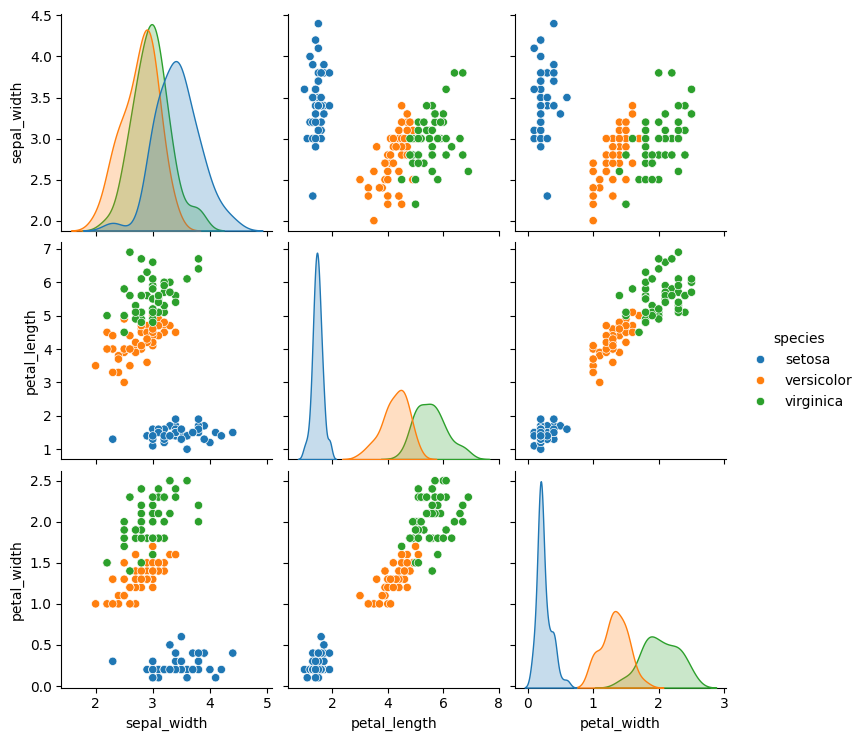

In [ ]:
 sns.pairplot(iris.iloc[:,1:],hue='species')

In [ ]:
label1, label2 = 'setosa','virginica'
f1, f2 = 'sepal_length','sepal_width'
df1 = iris[(iris['species']==label1) | (iris['species']==label2)]
X = df1[[f1,f2]].to_numpy()
y = (df1['species'] == label1).to_numpy()
print(y)
y = np.where(y, 1, 0)
print(y)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Train the perceptron
weights, bias = train_perceptron(X, y)



In [ ]:
# Make predictions
y_pred = predict(X, weights, bias)

print(y_pred[:10])

[1 1 1 1 1 1 1 1 1 1]


percpetron parametrs: w: [-0.518  0.76] b: 0.62

In [ ]:
print("w:",weights, "b:", bias)

w: [-0.518  0.76 ] b: 0.6200000000000003


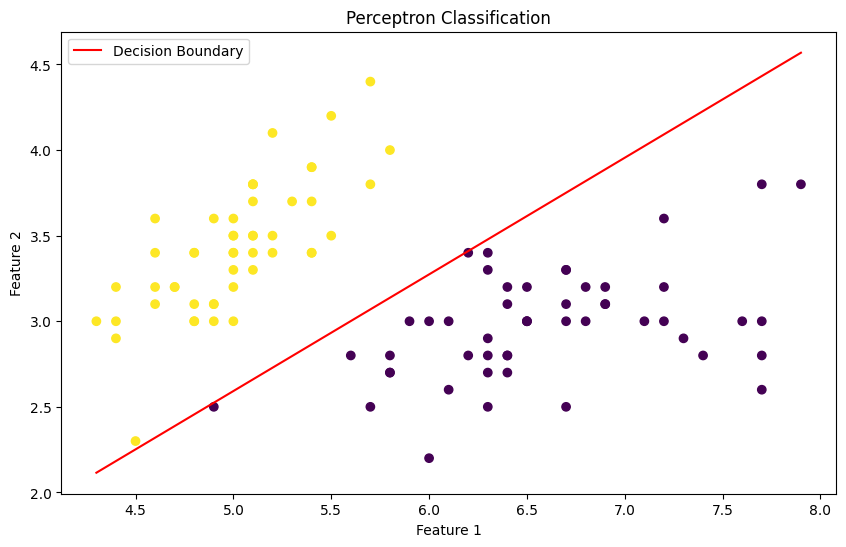

In [ ]:
# Plotting the data and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

# Decision boundary (w*x + b = 0)
x_values = [np.min(X[:, 0]), np.max(X[:, 0])]
x_values = np.array(x_values)  # Convert list to numpy array if it's not already
y_values = -(bias + weights[0] * x_values) / weights[1]
plt.plot(x_values, y_values, label="Decision Boundary", color='red')

plt.title('Perceptron Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# תרגיל 1

בתרגיל אתם תממשו למידה בפרספטרון

**AND**

עקבו אחר השלבים הבאים:


*   הגדירו את מטריצת הקלטים
*   הגדירו את וקטור הפלטים
*   צרו 100 דגימות בסה"כ

x=

0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1...

0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1...

y=

0 0 0 1 0 0 0 1 0 0 0 1...

*   מיצאו את פרמטרי המודל w,b
*   שרטטו את הגרף הכולל את הנקודות ואת הקו המבדיל



הנחיות לשרטוט הקו המבדיל:

 אם התוצאה של

 w⋅x+b > 0

 אזי מדובר במחלקה 1

  אם התוצאה של

 w⋅x+b < 0

 אזי מדובר במחלקה 2


ולכן קו ההפרדה הוא כאשר:


w1x + w2y + b = 0

שרטוט הקו יהיה עפ"י

y = -b/w2 - w1/w2 * x

# ! חשוב ביותר !
קו ההפרדה צריך להיות קו שאינו עובר באחת מהנקודות

In [ ]:
# YOUR CODE HERE